In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [21]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data - Copy.csv')

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


In [22]:
df.drop('id',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
df.shape

(5110, 11)

In [23]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
le=LabelEncoder()

In [24]:
df['gender']=le.fit_transform(df['gender'])

In [25]:
df['ever_married']=le.fit_transform(df['ever_married'])

In [26]:
df['Residence_type']=le.fit_transform(df['Residence_type'])

In [32]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [29]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = ohe.fit_transform(df[['work_type']])
encoded_cols = encoded_cols.astype(int)  # Convert floats to ints

encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(['work_type']))
df = df.drop('work_type', axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [33]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = ohe.fit_transform(df[['smoking_status']])
encoded_cols = encoded_cols.astype(int)  # Convert floats to ints

encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(['smoking_status']))
df = df.drop('smoking_status', axis=1)
df = pd.concat([df, encoded_df], axis=1)

<Axes: >

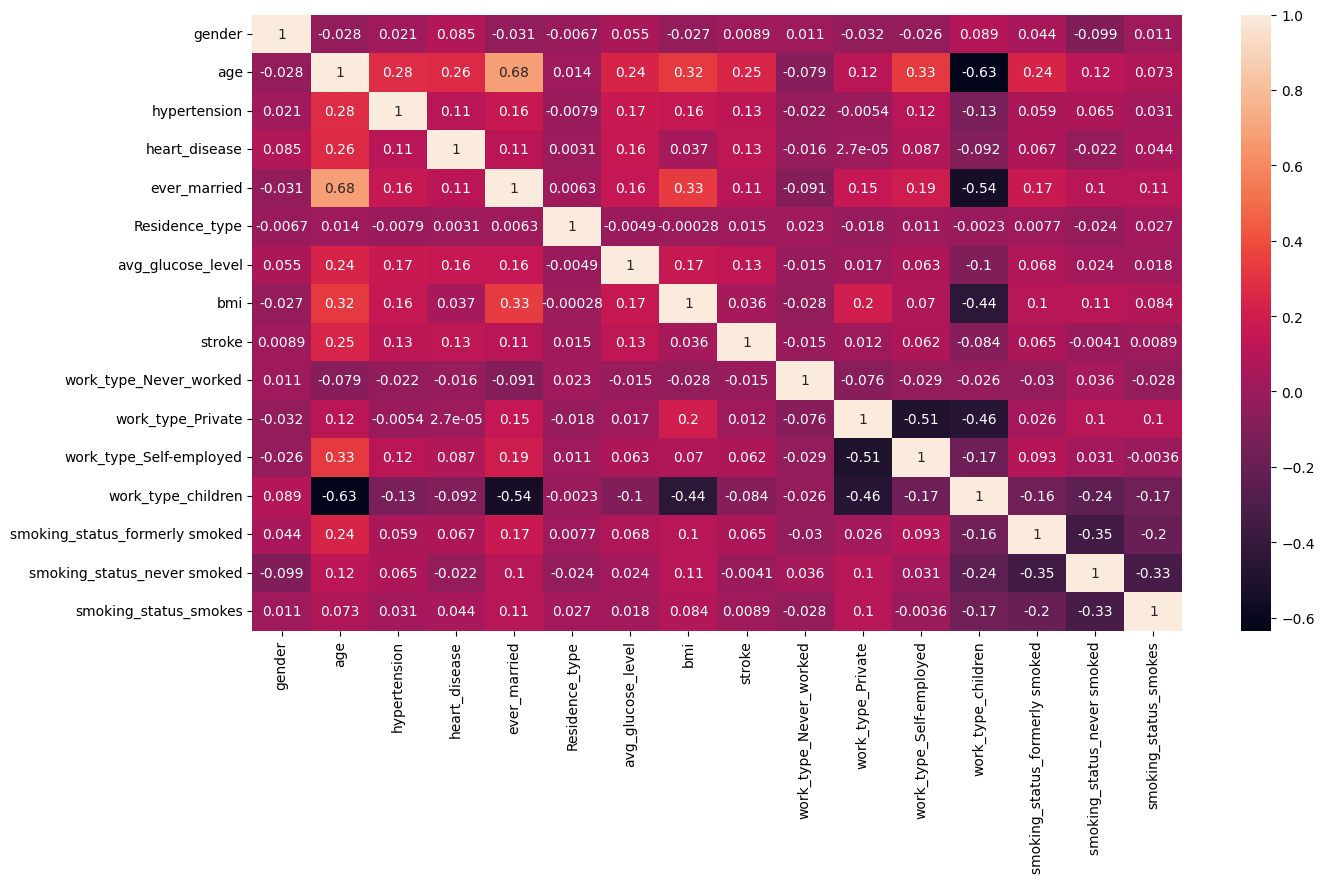

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='age', ylabel='Count'>

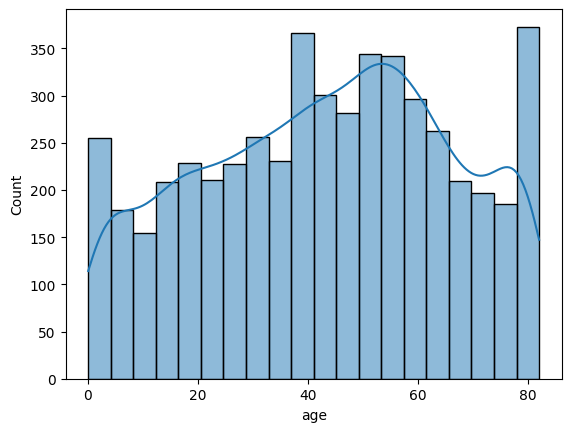

In [37]:
sns.histplot(df['age'],kde=True)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

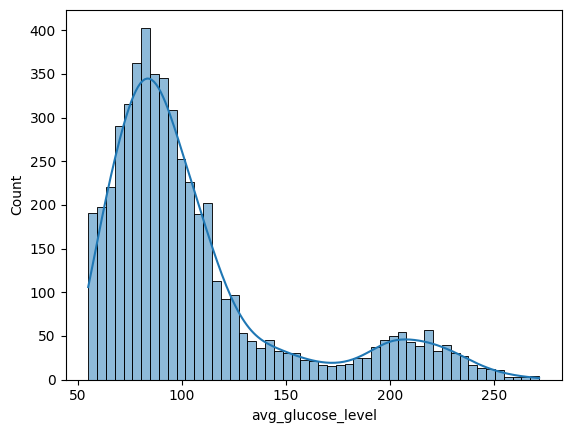

In [38]:
sns.histplot(df['avg_glucose_level'],kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

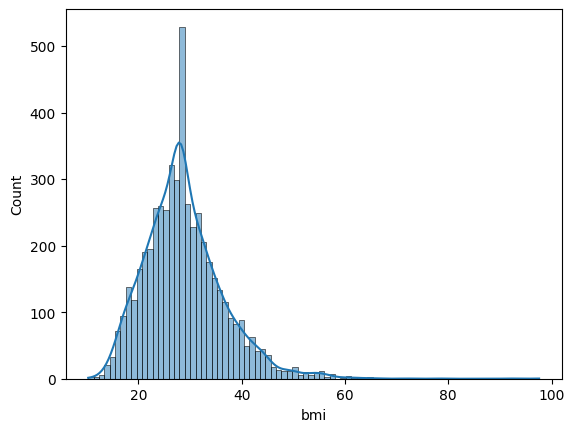

In [39]:
sns.histplot(df['bmi'],kde=True)

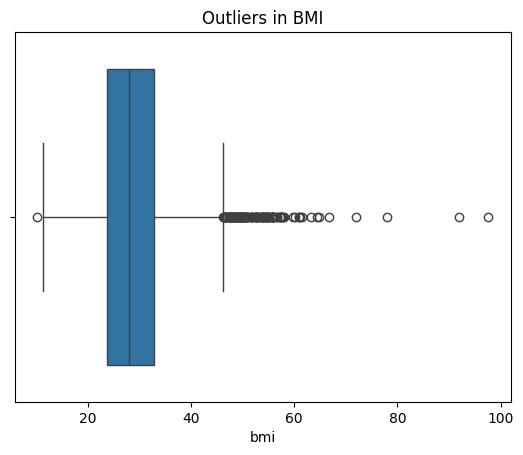

In [40]:
sns.boxplot(x=df['bmi'])
plt.title('Outliers in BMI')
plt.show()

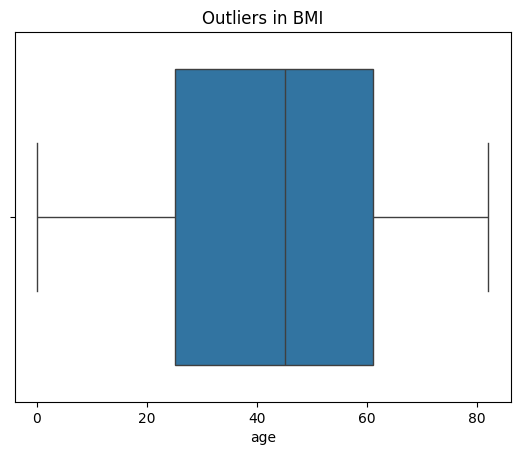

In [41]:
sns.boxplot(x=df['age'])
plt.title('Outliers in BMI')
plt.show()

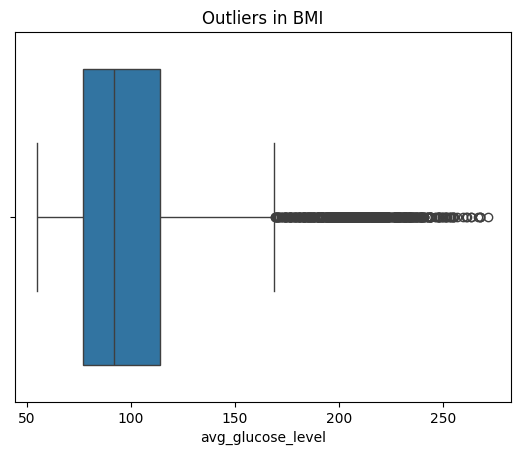

In [42]:
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Outliers in BMI')
plt.show()

In [43]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [51]:
from google.colab import files

# Step 1: Split original data (df) into X and y
X = df.drop(columns='stroke')
y = df['stroke']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Step 4: Convert resampled X and y to DataFrame
X_resampled_df = pd.DataFrame(X_train_res, columns=X.columns)
y_resampled_df = pd.DataFrame(y_train_res, columns=['stroke'])

# Step 5: Combine X and y
resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Step 6: Save to CSV
resampled_data.to_csv('stroke_dataset_smote.csv', index=False)

# Step 7: Download the CSV
files.download('stroke_dataset_smote.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
df_resampled=pd.read_csv('/content/stroke_dataset_smote.csv')

In [62]:
X = df_resampled.drop(columns='stroke')
y = df_resampled['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print('Training accuracy: ',accuracy_score(y_train,model.predict(X_train)))
print('Testing accuracy: ',accuracy_score(y_test,model.predict(X_test)))
print("✅ Classification Report:\n", classification_report(y_test,y_pred))

✅ Accuracy: 0.9530848329048843
Training accuracy:  1.0
Testing accuracy:  0.9530848329048843
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       778
           1       0.95      0.96      0.95       778

    accuracy                           0.95      1556
   macro avg       0.95      0.95      0.95      1556
weighted avg       0.95      0.95      0.95      1556



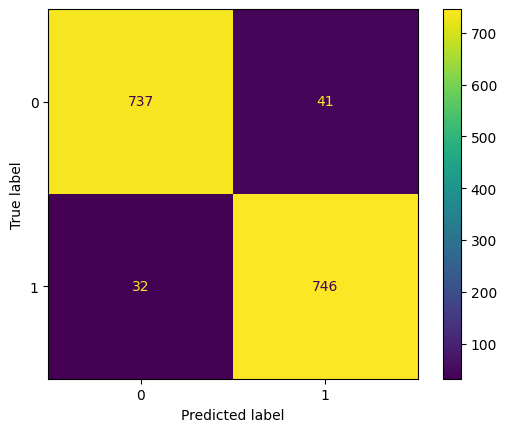

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

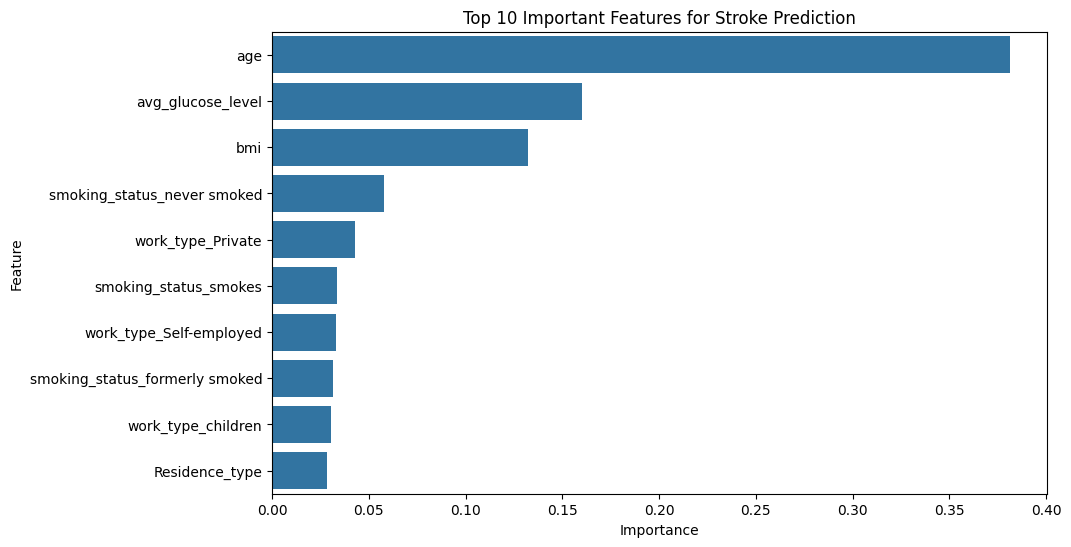

In [64]:
importances = model.feature_importances_
features = X.columns

# Plot top 10
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features for Stroke Prediction")
plt.show()

🔍 ROC-AUC Score: 0.9895


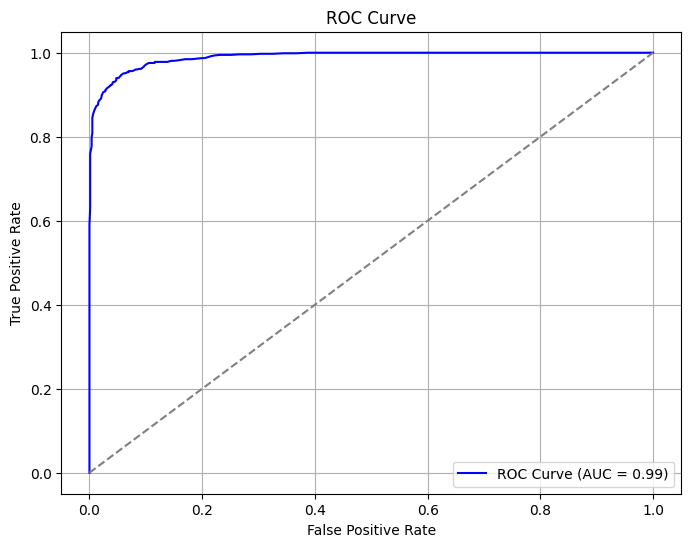

✅ Best Threshold: 0.61
📊 Classification Report (Custom Threshold):
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       778
           1       0.95      0.94      0.95       778

    accuracy                           0.95      1556
   macro avg       0.95      0.95      0.95      1556
weighted avg       0.95      0.95      0.95      1556



In [69]:
from sklearn.metrics import roc_curve

# Step 1: Get predicted probabilities (for class 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Step 2: ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("🔍 ROC-AUC Score:", round(roc_auc, 4))

# Step 3: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Step 4: Find best threshold using Youden's J (tpr - fpr)
best_index = (tpr - fpr).argmax()
best_threshold = thresholds[best_index]
print("✅ Best Threshold:", round(best_threshold, 4))

# Step 5: Apply new threshold to predictions
y_pred_thresh = (y_probs >= best_threshold).astype(int)

# Step 6: Re-evaluate with new threshold
from sklearn.metrics import classification_report
print("📊 Classification Report (Custom Threshold):\n", classification_report(y_test,y_pred_thresh))

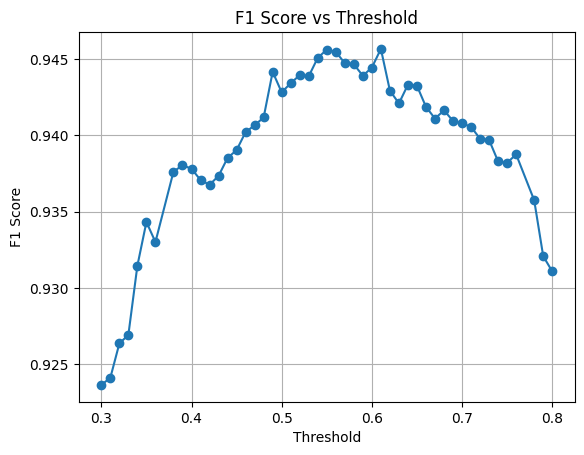

In [70]:
from sklearn.metrics import f1_score

f1_scores = []
thresholds_to_test = [round(x, 2) for x in thresholds if 0.3 <= x <= 0.8]

for t in thresholds_to_test:
    y_pred_t = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

plt.plot(thresholds_to_test, f1_scores, marker='o')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.grid(True)
plt.show()

In [71]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


In [72]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [76]:
pd.crosstab(df['gender'],df['stroke'])

stroke,0,1
gender,,
0,2853,141
1,2007,108
2,1,0


In [77]:
new_data = pd.DataFrame([{
    'gender': 1,
    'age': 62,
    'hypertension': 1,
    'heart_disease': 0,
    'ever_married': 1,
    'Residence_type': 1,
    'avg_glucose_level': 185.6,
    'bmi': 28.4,
    'work_type_Never_worked': 0,
    'work_type_Self-employed': 0,
    'work_type_Private': 1,
    'work_type_children': 0,
    'smoking_status_formerly smoked': 1,
    'smoking_status_never smoked': 0,
    'smoking_status_smokes': 0
}])

# ✅ Step 2: Align with training data columns
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# ✅ Step 3: Predict stroke probability
prob = model.predict_proba(new_data)[0][1]

# ✅ Step 4: Apply best threshold (0.61)
prediction = 1 if prob >= 0.61 else 0

print(f"🧠 Predicted Stroke Risk: {prediction}")
print(f"🔢 Probability of Stroke: {round(prob,4)}")

🧠 Predicted Stroke Risk: 0
🔢 Probability of Stroke: 0.14


In [78]:
low_risk = pd.DataFrame([{
    'gender': 1,                       # Male
    'age': 28,                         # Young
    'hypertension': 0,
    'heart_disease': 0,
    'ever_married': 0,                 # Not married
    'Residence_type': 1,               # Urban
    'avg_glucose_level': 85.0,         # Normal sugar
    'bmi': 22.5,                       # Healthy BMI
    'work_type_Never_worked': 0,
    'work_type_Self-employed': 0,
    'work_type_Private': 1,
    'work_type_children': 0,
    'smoking_status_formerly smoked': 0,
    'smoking_status_never smoked': 1,
    'smoking_status_smokes':0
}])

high_risk = pd.DataFrame([{
    'gender': 0,                       # Female
    'age': 75,                         # Senior
    'hypertension': 1,
    'heart_disease': 1,
    'ever_married': 1,                 # Married
    'Residence_type': 0,               # Rural
    'avg_glucose_level': 260.0,        # Very high sugar
    'bmi': 33.0,                       # Overweight
    'work_type_Never_worked': 0,
    'work_type_Self-employed': 1,
    'work_type_Private': 0,
    'work_type_children': 0,
    'smoking_status_formerly smoked': 1,
    'smoking_status_never smoked': 0,
    'smoking_status_smokes':0
}])

for person, label in zip([low_risk, high_risk], ['Low Risk', 'High Risk']):
    person = person.reindex(columns=X.columns, fill_value=0)
    prob = model.predict_proba(person)[0][1]
    prediction = 1 if prob >= 0.61 else 0
    print(f"\n🔍 {label} Person")
    print(f"🧠 Predicted Stroke Risk: {prediction}")
    print(f"📊 Probability: {round(prob,4)}")


🔍 Low Risk Person
🧠 Predicted Stroke Risk: 0
📊 Probability: 0.0

🔍 High Risk Person
🧠 Predicted Stroke Risk: 0
📊 Probability: 0.25


In [80]:
y_probs = model.predict_proba(X_test)[:, 1]

# Get FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Youden's J: max(tpr - fpr)
j_scores = tpr - fpr
best_threshold = thresholds[j_scores.argmax()]

print(f"🧠 Best Threshold (Youden's J): {round(best_threshold,4)}")

🧠 Best Threshold (Youden's J): 0.61


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Threshold (Youden's J): 0.7516000270843506

📊 Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       778
           1       0.97      0.94      0.95       778

    accuracy                           0.96      1556
   macro avg       0.96      0.96      0.95      1556
weighted avg       0.96      0.96      0.95      1556

✅ Accuracy: 0.955


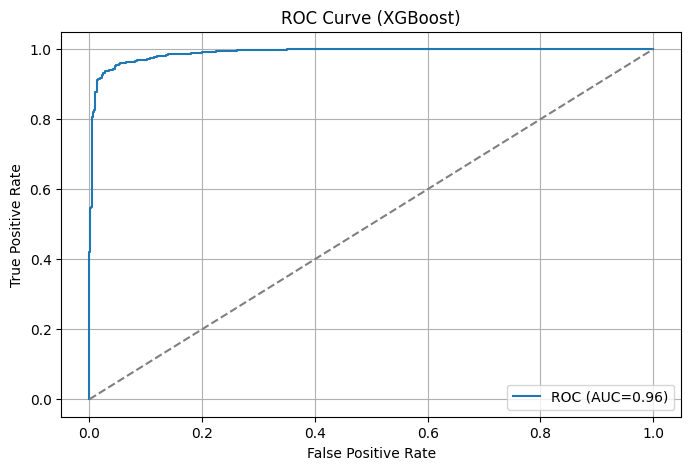

In [81]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load your SMOTE-augmented dataset
df = pd.read_csv("stroke_dataset_smote.csv")

# Separate features and label
X = df.drop(columns='stroke')
y = df['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict on test set
y_probs = model.predict_proba(X_test)[:, 1]

# Find best threshold using Youden's J
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
youden_index = (tpr - fpr).argmax()
best_threshold = thresholds[youden_index]

print(f"✅ Best Threshold (Youden's J): {round(best_threshold, 4)}")

# Predict using new threshold
y_pred_custom = (y_probs >= best_threshold).astype(int)

# Report
print("\n📊 Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_custom))

# Optional: Accuracy
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred_custom), 4))

# ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC (AUC={round(accuracy_score(y_test, y_pred_custom), 2)})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve (XGBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()

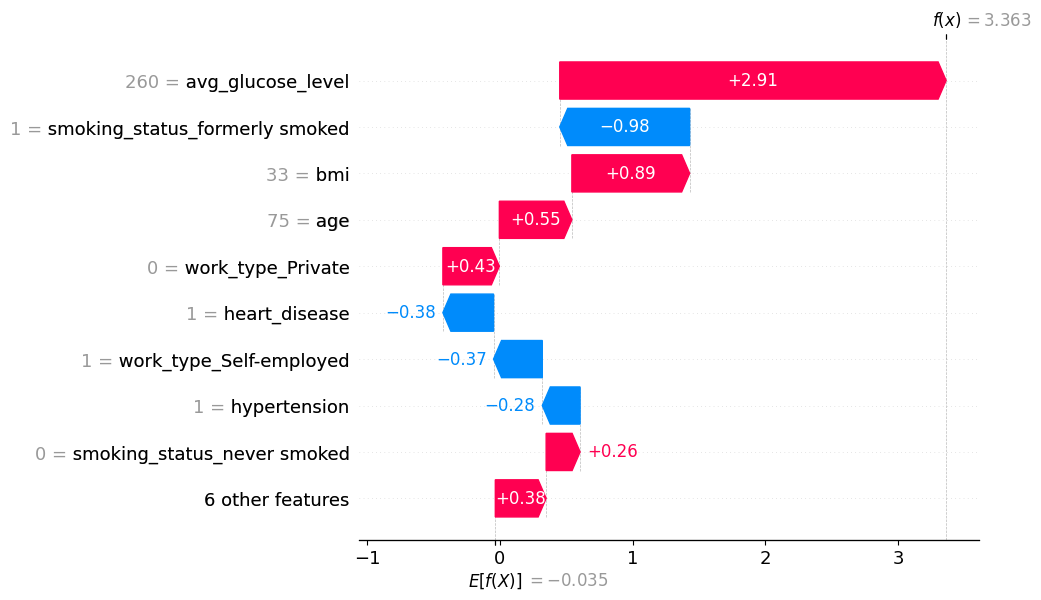

In [83]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(high_risk)

shap.plots.waterfall(shap_values[0])

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Define top SHAP features
top_features = ['avg_glucose_level', 'smoking_status_formerly smoked', 'bmi', 'age']

# Step 2: Create new X with only top features
X_top = df_resampled[top_features]
y_top = df_resampled['stroke']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y_top, test_size=0.2, stratify=y_top, random_state=42)

# Step 4: Train Random Forest
rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = rf_top.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9254498714652957
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       778
           1       0.90      0.96      0.93       778

    accuracy                           0.93      1556
   macro avg       0.93      0.93      0.93      1556
weighted avg       0.93      0.93      0.93      1556



In [93]:
low_risk = pd.DataFrame([{
    'avg_glucose_level': 85.0,                # normal range
    'smoking_status_formerly smoked': 0,      # never smoked
    'bmi': 22.0,                               # healthy BMI
    'age': 30                                  # young adult
}])
high_risk = pd.DataFrame([{
    'avg_glucose_level': 255.0,               # very high glucose
    'smoking_status_formerly smoked': 1,      # past smoker
    'bmi': 34.5,                               # obese
    'age': 74                                  # elderly
}])
for person, label in zip([low_risk, high_risk], ['Low Risk', 'High Risk']):
    prob = rf_top.predict_proba(person)[0][1]
    prediction = 1 if prob >= 0.61 else 0
    print(f"\n🔍 {label} Person")
    print(f"📊 Probability of Stroke: {round(prob, 4)}")
    print(f"🧠 Predicted Stroke Risk: {prediction}")



🔍 Low Risk Person
📊 Probability of Stroke: 0.0
🧠 Predicted Stroke Risk: 0

🔍 High Risk Person
📊 Probability of Stroke: 0.75
🧠 Predicted Stroke Risk: 1


In [96]:
extra_features = [
    'avg_glucose_level',
    'smoking_status_formerly smoked',
    'bmi',
    'age',
    'hypertension',
    'heart_disease',
    'ever_married',
    'gender'
]

X_extra = df_resampled[extra_features]
y_extra = df_resampled['stroke']
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_extra, y_extra, test_size=0.2, stratify=y_extra, random_state=42
)

# Train the model
rf_extra = RandomForestClassifier(random_state=42)
rf_extra.fit(X_train, y_train)

# Evaluate
y_pred = rf_extra.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9222365038560412
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       778
           1       0.89      0.96      0.92       778

    accuracy                           0.92      1556
   macro avg       0.92      0.92      0.92      1556
weighted avg       0.92      0.92      0.92      1556



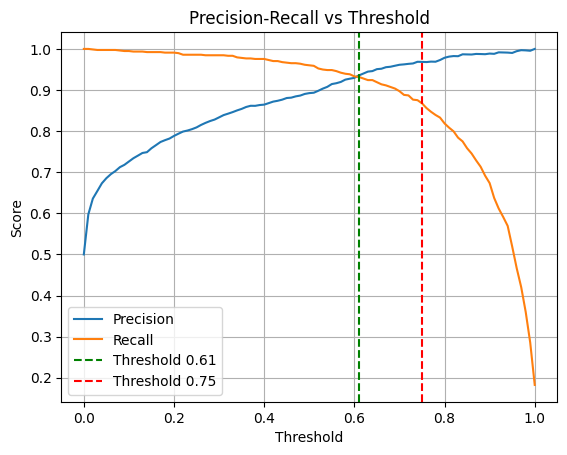

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(x=0.61, color='green', linestyle='--', label='Threshold 0.61')
plt.axvline(x=0.75, color='red', linestyle='--', label='Threshold 0.75')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()


In [95]:
import joblib

# Save the trained model
joblib.dump(rf_top, 'rf_stroke_model.pkl')
from google.colab import files

# Download the file
files.download('rf_stroke_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>